In [2]:
import os
root_proj = '/Users/luo/OneDrive/GitHub/sentinel3-altimetry-l2'
os.chdir(root_proj)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
from osgeo import gdal
from utils.imgShow import imgShow
from utils.get_filesPath import get_filesPath


In [6]:
dir_s3l2 = 'data/s3-altimetry/s3a-orbit-289'
# dir_output = root_dir + '/results'


In [8]:
## data prepare
# 1. get files path
files_path = get_filesPath(dir_s3l2, key_words='enhanced_measurement_subs.nc')
files_path = sorted(files_path)
print('s3l2 files number:', len(files_path))
# files_path


s3l2 files number: 2


## Extract waveform from the s3_l2 product

In [14]:
wf_records = None
for path_s3l2 in files_path:
    print(path_s3l2)
    s3_l2 = xr.open_dataset(path_s3l2)
    wf = s3_l2["waveform_20_ku"]
    for ind in range(1, wf.shape[0], 5):    # selected 1/5 footprints as the training data.
        if wf_records is None:
            wf_records = wf[ind]
            continue
        wf_records = xr.concat([wf_records, wf[ind]], dim='time_20_ku', coords='all')

wf_records = wf_records.to_dataset(name = 'waveform_20_ku')
# wf_records


data/s3-altimetry/s3a-orbit-289/S3A_SR_2_LAN____20200523T030933_20200523T035741_20200617T203903_2888_058_289______LN3_O_NT_004.SEN3/enhanced_measurement_subs.nc
data/s3-altimetry/s3a-orbit-289/S3A_SR_2_LAN____20200619T030711_20200619T035739_20200714T201953_3028_059_289______LN3_O_NT_004.SEN3/enhanced_measurement_subs.nc


<xarray.Dataset>
Dimensions:         (echo_sample_ind: 128, time_20_ku: 78)
Coordinates:
  * time_20_ku      (time_20_ku) datetime64[ns] 2020-05-23T03:25:19.546147328...
    lat_20_ku       (time_20_ku) float64 25.12 25.11 25.09 ... 24.6 24.59 24.58
    lon_20_ku       (time_20_ku) float64 102.8 102.8 102.8 ... 102.7 102.7 102.7
Dimensions without coordinates: echo_sample_ind
Data variables:
    waveform_20_ku  (time_20_ku, echo_sample_ind) float64 29.79 24.09 ... 2.177

## Visualizing the waveform and labeling by manual 

In [59]:
wf_sams.shape[0]

78

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan, nan])

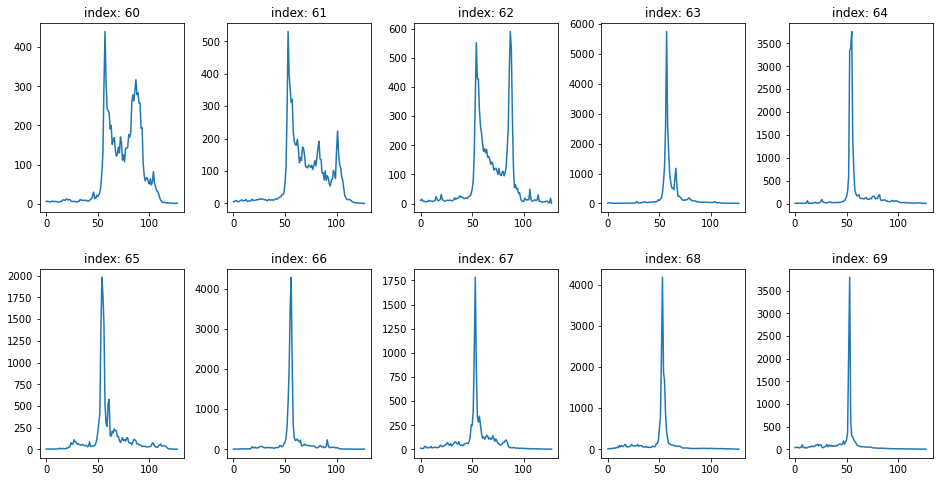

In [68]:
wf_sams = wf_records["waveform_20_ku"]
wf_label = np.full(shape= wf_sams.shape[0], fill_value=np.nan)
fig = plt.figure(figsize=(16, 8))
i_th = 6    ## !!!the condition is required: i_th*10+10 <= wf_sams.shape[0]
for i, ind in enumerate(range(i_th*10, i_th*10+10)):   ## manually labeling for per 10 footprints.
    if ind >= wf_sams.shape[0]:
        continue
    ax = plt.subplot(2, 5, i+1)
    ax.plot(wf_sams[ind])
    plt.title('index: '+ str(ind))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

wf_num = [0,1,2,3,4,5,6,7,8,9]
wf_label[i_th*10: i_th*10+10] = [1,0,1,0,0,0,0,0,0,0]
# wf_label


## Save the labeled waveform data

In [34]:
wf_records['waveform_label'] = (['time_20_ku'], wf_label)
wf_records['waveform_label'].attrs['name'] = 'waveform labels, 1 represents ocean-like waveform and 0 represents noisy waveform'
wf_records
# wf_records.to_netcdf(path='data/dset-waveform/dset_waveform.nc')



<xarray.Dataset>
Dimensions:         (echo_sample_ind: 128, time_20_ku: 78)
Coordinates:
  * time_20_ku      (time_20_ku) datetime64[ns] 2020-05-23T03:25:19.546147328...
    lat_20_ku       (time_20_ku) float64 25.12 25.11 25.09 ... 24.6 24.59 24.58
    lon_20_ku       (time_20_ku) float64 102.8 102.8 102.8 ... 102.7 102.7 102.7
Dimensions without coordinates: echo_sample_ind
Data variables:
    waveform_20_ku  (time_20_ku, echo_sample_ind) float64 29.79 24.09 ... 2.177
    waveform_label  (time_20_ku) float64 nan nan nan nan nan ... nan nan nan nan